# Logistic Regression 

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from scipy.optimize import minimize

In [3]:
data1 = pd.read_csv("E:\\Machine Learning\\1\\ex2data1.csv")

data1.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [21]:
X1_mat = np.transpose(np.mat(data1["X1"]))
X2_mat = np.transpose(np.mat(data1["X2"]))
X_mat = np.hstack((X1_mat, X2_mat))
Y_mat = np.transpose(np.mat(data1["Y"]))

X1_array = np.array(data1["X1"])
X2_array = np.array(data1["X2"])
Y_array = np.array(data1["Y"])

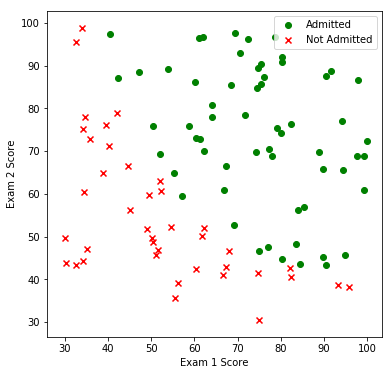

In [24]:
plt.figure(num = 1, figsize = (6, 6))

plt.scatter(X1_array[Y_array == 1], X2_array[Y_array == 1], marker = "o", color = "green")
plt.scatter(X1_array[Y_array == 0], X2_array[Y_array == 0], marker = "x", color = "red")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(labels = ["Admitted", "Not Admitted"], loc = "upper right")

In [31]:
m = np.shape(X_mat)[0]
n = np.shape(X_mat)[1]

ones = np.transpose(np.mat(np.ones(m)))
X_mat_ones = np.hstack((ones, X_mat))

In [69]:
epsilon = 1e-5

def costFunction(X, Y, theta):
    Y_predict = 1 / (1 + np.exp(-X * theta))
    J = -1/m * sum(np.multiply(Y, np.log(Y_predict + epsilon)) + np.multiply(1 - Y, np.log(1 - Y_predict + epsilon)))
    
    return J[0, 0]

In [70]:
theta_initial = np.transpose(np.mat(np.zeros(n + 1)))

costFunction(X_mat_ones, Y_mat, theta_initial)

0.693127180759944

In [134]:
def gradientDesc(X, Y, theta, alpha):
    epsilon = 1e-5
    Y_predict = 1 / (1 + np.exp(-X * theta))
    J = -1/m * sum(np.multiply(Y, np.log(Y_predict + epsilon)) + np.multiply(1 - Y, np.log(1 - Y_predict + epsilon)))
    
    theta_list = [theta]
    J_list = [J[0, 0]]
    
    G_theta = np.mat(np.zeros((n + 1, 1)))

    for j in range(0, n + 1, 1):
        G_theta[j, :] = 1/m * sum(np.multiply(Y_predict - Y, X[:, j]))[0, 0]
    
    
    return G_theta

In [135]:
gradientDesc(X_mat_ones, Y_mat, theta_initial, 0.01)

matrix([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]])

In [142]:
test_theta = np.transpose(np.mat([-24, 0.2, 0.2]))

test_cost = costFunction(X_mat_ones, Y_mat, test_theta)
test_grad = gradientDesc(X_mat_ones, Y_mat, test_theta, 0.01)

test_cost, test_grad

(0.2183139402975785, matrix([[0.04290299],
         [2.56623412],
         [2.64679737]]))

In [167]:
def costFunction2(theta_array):
    theta = np.transpose(np.mat(theta_array))
    
    Y_predict = 1 / (1 + np.exp(-X_mat_ones * theta))
    J = -1/m * sum(np.multiply(Y_mat, np.log(Y_predict + epsilon)) + np.multiply(1 - Y_mat, np.log(1 - Y_predict + epsilon)))
    
    return J[0, 0]

In [170]:
theta_array = np.zeros(n + 1)

theta_optimum = minimize(costFunction2, theta_array, method = 'bfgs')

theta_optimum

      fun: 0.2034833028123536
 hess_inv: array([[ 3.27886466e+03, -2.61401880e+01, -2.67541850e+01],
       [-2.61401880e+01,  2.22404263e-01,  2.00693302e-01],
       [-2.67541850e+01,  2.00693302e-01,  2.33544350e-01]])
      jac: array([1.11758709e-08, 1.99675560e-06, 3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 135
      nit: 20
     njev: 27
   status: 0
  success: True
        x: array([-25.16181675,   0.20623641,   0.20147508])

Decision Boundary: 0 = -25.16 + 0.21 * X1 + 0.20 * X2

In [171]:
X1_plot = np.arange(20, 110, 0.1)
X2_plot = 25.16 * 5 - 0.21 * 5 * X1_plot

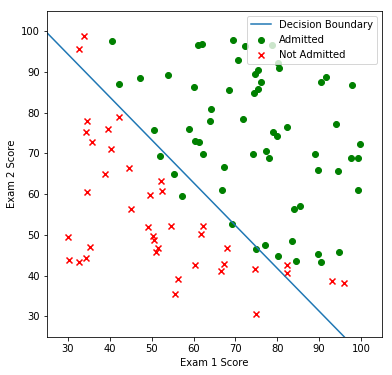

In [174]:
plt.figure(num = 1, figsize = (6, 6))
plt.scatter(X1_array[Y_array == 1], X2_array[Y_array == 1], marker = "o", color = "green")
plt.scatter(X1_array[Y_array == 0], X2_array[Y_array == 0], marker = "x", color = "red")
plt.plot(X1_plot, X2_plot)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.xlim((25, 105))
plt.ylim((25, 105))
plt.legend(labels = ["Decision Boundary", "Admitted", "Not Admitted"], loc = "upper right")

Question: How to use the opimimization function in Python --- minimize(fun, x0, args = (), method = "bfgs")???

Predictions

In [175]:
data1.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [188]:
theta_optimum = np.transpose(np.mat((-25.16, 0.21, 0.20)))

data1["P"] = 1 / (1 + np.exp(-X_mat_ones * theta_optimum))

for i in range(0, len(data1), 1):
    if data1["P"][i] >= 0.5:
        data1["Predict"][i] = 1
    else:
        data1["Predict"][i] = 0 

c:\python27\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\python27\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [190]:
data1.head(10)

,X1,X2,Y,P,Predict
0,34.623660,78.024693,0,0.092449,0
1,30.286711,43.894998,0,0.000044,0
2,35.847409,72.902198,0,0.045148,0
3,60.182599,86.308552,1,0.991338,1
4,79.032736,75.344376,1,0.998507,1
5,45.083277,56.316372,0,0.011783,0
6,61.106665,96.511426,1,0.999066,1
7,75.024746,46.554014,1,0.476517,0
8,76.098787,87.420570,1,0.999753,1
9,84.432820,43.533393,1,0.782036,1


Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected.

In [191]:
data2 = pd.read_csv("E:\\Machine Learning\\1\\ex2data2.csv")
X1 = data2["X1"]
X2 = data2["X2"]
Y = data2["Y"]

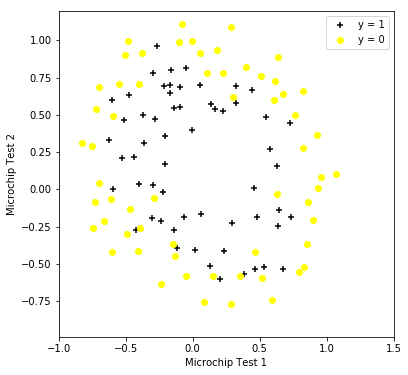

In [192]:
plt.figure(num = 1, figsize = (6, 6))
plt.scatter(X1[Y == 1], X2[Y == 1], marker = "+", color = "black")
plt.scatter(X1[Y == 0], X2[Y == 0], marker = "o", color = "yellow")
plt.xlim((-1, 1.5))
plt.ylim((-0.99, 1.2))
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(labels = ["y = 1", "y = 0"], loc = "upper right")

The figure above shows that the dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

Feature Mapping

One way to fit the data better is to create more features from each data point.

In [193]:
def mapFeature(X1, X2, degree):
    features = []
    
    for i in range(0, degree + 1, 1):
        for j in range(0, i + 1, 1):
            features.append((X1 ** j) * (X2 ** (i - j)))
            
    
    return pd.DataFrame(np.transpose(features))

In [194]:
mapFeature(X1, X2, 6).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.69956,0.051267,0.489384,0.035864,0.002628,0.342354,0.025089,0.001839,0.000135,...,0.000066,0.000005,3.541519e-07,0.117206,0.008589,0.000629,0.000046,0.000003,2.477505e-07,1.815630e-08
1,1.0,0.68494,-0.092742,0.469143,-0.063523,0.008601,0.321335,-0.043509,0.005891,-0.000798,...,-0.000374,0.000051,-6.860919e-06,0.103256,-0.013981,0.001893,-0.000256,0.000035,-4.699318e-06,6.362953e-07
2,1.0,0.69225,-0.213710,0.479210,-0.147941,0.045672,0.331733,-0.102412,0.031616,-0.009761,...,-0.004677,0.001444,-4.457837e-04,0.110047,-0.033973,0.010488,-0.003238,0.001000,-3.085938e-04,9.526844e-05
3,1.0,0.50219,-0.375000,0.252195,-0.188321,0.140625,0.126650,-0.094573,0.070620,-0.052734,...,-0.013299,0.009931,-7.415771e-03,0.016040,-0.011978,0.008944,-0.006679,0.004987,-3.724126e-03,2.780914e-03
4,1.0,0.46564,-0.513250,0.216821,-0.238990,0.263426,0.100960,-0.111283,0.122661,-0.135203,...,-0.029315,0.032312,-3.561597e-02,0.010193,-0.011235,0.012384,-0.013650,0.015046,-1.658422e-02,1.827990e-02


As a result of this mapping, the vector of two features has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in the 2-dimensional plot.

In [246]:
Y_mat = np.transpose(np.mat(Y))
X_mat = np.mat(mapFeature(X1, X2, 6))
theta_array = np.zeros(np.shape(X_mat)[1])

In [282]:
def costFunctionReg(theta_array, lambda1):
    m = len(Y_mat)
    theta_mat = np.transpose(np.mat(theta_array))
    
    Y_predict = 1 / (1 + np.exp(-X_mat * theta_mat))
    J_theta = 1/m * sum(-np.multiply(Y_mat, np.log(Y_predict)) - np.multiply(1 - Y_mat, np.log(1 - Y_predict))) + \
                lambda1/(2*m) * (sum(np.power(theta_mat, 2)) - np.power(theta_mat[0, :], 2))
    
    
    return J_theta[0, 0]

In [283]:
costFunctionReg(theta_array, 1)

0.6931471805599461

In [284]:
theta_array_test = np.ones(np.shape(X_mat)[1])

costFunctionReg(theta_array_test, 1)

2.1348483146658577

In [285]:
def gradientDescReg(theta_array, lambda1):
    theta_mat = np.transpose(np.mat(theta_array))
    m = len(Y_mat)
    n = len(theta_array)
    G_theta = np.zeros((len(theta_array), 1))
    Y_predict = 1 / (1 + np.exp(-X_mat * theta_mat))
    
    G_theta[0, :] = 1/m * sum(np.multiply(Y_predict - Y_mat, X_mat[:, 0]))
    for j in range(1, n, 1):
        G_theta[j, :] = 1/m * sum(np.multiply(Y_predict - Y_mat, X_mat[:, j]))
    
    
    return G_theta

In [286]:
theta_optimum_reg = minimize(costFunctionReg, theta_array, 1, method = 'bfgs')

In [287]:
theta_optimum_reg

      fun: 0.5290027422699075
 hess_inv: array([[ 1.07872370e+01,  1.21055825e+00,  1.00448530e+00,
        -1.30861200e+01, -2.24782682e+00, -8.74273073e+00,
        -6.58265650e-01, -2.41254340e-01, -1.63846311e+00,
         7.79159380e-01, -5.04917792e+00,  1.04360360e-01,
        -4.02466607e+00,  2.58245271e+00, -4.71367089e+00,
         2.14106325e+00, -5.46222707e-01, -1.68166253e+00,
         8.86166600e-01, -2.05798246e-02, -7.12702242e-02,
         6.04266991e-01,  2.82184802e-01, -1.98579957e+00,
         1.32755207e+00, -1.58930236e+00,  2.03184648e+00,
        -2.30656343e+00],
       [ 1.21055825e+00,  1.78579343e+01,  4.31864461e+00,
        -4.52880018e+00, -7.87377179e+00, -3.46441101e+00,
        -2.97893592e+00,  4.17869845e-01,  3.97061586e+00,
        -7.24721115e-01, -6.56809655e+00, -1.74133901e+00,
         1.58008831e+00, -6.55598345e-01, -1.86277862e+00,
        -6.07102744e+00,  1.52965607e-01,  3.72746638e-01,
         8.02904345e-01,  1.74705562e+00, -1.492

Question: How to use the opimimization function in Python --- minimize(fun, x0, args = (), method = "bfgs")???

In [288]:
theta_optimum_reg = np.array([1.27268771,  1.18096621,  0.6255695 , -1.43194218, -0.91761479,
       -2.01919934, -0.17485719, -0.35703503, -0.36513131,  0.12376034,
       -1.19282633, -0.27464138, -0.61603993, -0.05129686, -1.45843771,
       -0.45613278, -0.29525891, -0.27782714, -0.04499822, -0.20570129,
       -0.24270242, -0.92460229, -0.14389253, -0.32759267,  0.01543425,
       -0.29265686,  0.02762759, -1.04377951])

In [289]:
def plotplot(lambda1):
    plt.figure(num = 1, figsize = (6, 6))

    plt.scatter(X1[Y == 1], X2[Y == 1], marker = "+", color = "black")
    plt.scatter(X1[Y == 0], X2[Y == 0], marker = "o", color = "yellow")

    x_reg_plot = np.linspace(-1, 1.5, 50)
    y_reg_plot = np.linspace(-1, 1.5, 50)
    z_reg_plot = np.zeros((len(x_reg_plot), len(y_reg_plot)))

    for i in range(0, len(x_reg_plot), 1):
        for j in range(0, len(y_reg_plot), 1):
            temp = np.transpose(np.mat((mapFeature(x_reg_plot[i], y_reg_plot[j], 6)))) * np.transpose(np.mat(theta_optimum_reg))
            z_reg_plot[i][j] = temp[0, 0]

    z_reg_plot = np.transpose(z_reg_plot)

    plt.contour(x_reg_plot, y_reg_plot, z_reg_plot, 0, colors = "green")

    plt.xlim((-1, 1.5))
    plt.ylim((-0.99, 1.2))
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.legend(labels = ["y = 1", "y = 0"], loc = "upper right")
    plt.title(lambda1)

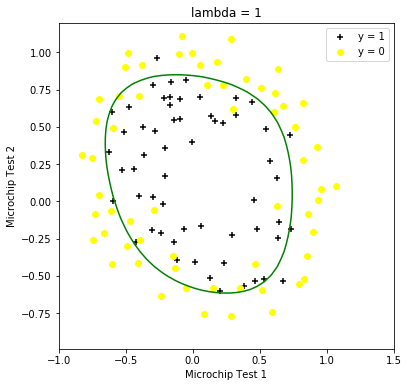

In [290]:
plotplot("lambda = 1")

lambda = 0

In [291]:
theta_optimum_reg = minimize(costFunctionReg, theta_array, 0, method = 'bfgs')

In [292]:
theta_optimum_reg

      fun: 0.2486428985370392
 hess_inv: array([[ 1.88543544e+03,  1.78738105e+03,  8.24644452e+02,
        -1.11874605e+04, -1.58736561e+02, -1.41863180e+04,
        -5.42634029e+03, -2.11821330e+02, -4.03573227e+03,
        -1.07137157e+03,  2.00376213e+04, -2.58744727e+03,
         5.05219616e+04,  3.65368300e+03,  2.82808415e+04,
         2.14169450e+03, -1.04057261e+04, -1.12359401e+04,
        -1.73951165e+04, -5.85302015e+03, -3.15560273e+03,
        -9.09476524e+03,  1.24512990e+04, -2.13359509e+04,
         2.93703587e+04, -4.46990597e+04, -3.34277108e+03,
        -1.18062506e+04],
       [ 1.78738105e+03,  5.56905150e+03,  3.46301600e+02,
        -8.81182346e+03,  3.00669794e+01, -1.25724015e+04,
        -2.14900305e+04,  1.29142728e+03, -1.12117368e+04,
         2.44019843e+03,  2.07067900e+04,  1.78841936e+03,
         4.10695484e+04,  3.22042580e+03,  2.30229343e+04,
         1.82581972e+04, -1.88602109e+04, -8.94425799e+03,
        -3.37960117e+04, -8.73294957e+03, -8.176

In [293]:
theta_optimum_reg = np.array([19.53112691,    15.94836311,    31.84694883,   -98.90603207,
         -83.64159362,  -190.62875536,   -39.71904482,  -126.46721154,
        -193.76060989,  -233.87714234,   179.50758524,   333.21626417,
         809.59643624,   499.01006538,   654.79989617,    34.74231011,
         128.25761466,   356.43045111,   614.37752136,   517.27676998,
         398.51177656,  -121.8250412 ,  -377.5971629 , -1010.50960407,
       -1031.46480943, -1496.80546631,  -893.505794  ,  -766.48891107])

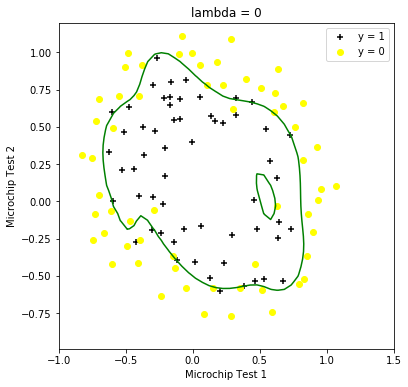

In [294]:
plotplot("lambda = 0")

lambda = 100

In [295]:
theta_optimum_reg = minimize(costFunctionReg, theta_array, 100, method = 'bfgs')

In [296]:
theta_optimum_reg

      fun: 0.6864838338804661
 hess_inv: array([[ 3.96687079e+00, -1.61485184e-01, -5.14693266e-02,
        -3.04900265e-01,  3.01547031e-02, -2.63617964e-01,
        -1.25587353e-01, -1.67655079e-02, -2.72624727e-02,
        -5.88849173e-02, -1.60724749e-01,  1.23899793e-02,
        -5.11687257e-02,  6.98645307e-03, -1.27052191e-01,
        -9.87152689e-02, -4.82344720e-03, -1.63120928e-02,
        -9.68708612e-03, -1.04662897e-02, -5.08080479e-02,
        -1.10660254e-01,  6.66466237e-03, -2.17104292e-02,
         2.16863396e-03, -1.91588690e-02,  1.66201503e-03,
        -7.93657886e-02],
       [-1.61485184e-01,  1.03938103e+00,  3.08272877e-02,
         1.31685213e-02, -2.89609524e-02, -6.22774559e-03,
        -5.87174520e-03, -3.91226554e-03, -9.69366989e-03,
         1.44312840e-02, -2.41776381e-02, -7.65049811e-03,
        -1.03957068e-02, -4.01628982e-03, -2.21134355e-02,
        -2.20703955e-02, -4.53113472e-03, -7.83700443e-03,
        -2.14743860e-04, -6.01270955e-03,  1.273

In [297]:
theta_optimum_reg = np.array([0.02188588,  0.00571029, -0.01748175, -0.03859921, -0.01314895,
       -0.05516946, -0.02280497, -0.00892441, -0.00773241, -0.0184636 ,
       -0.04143637, -0.00349512, -0.01415637, -0.00235626, -0.04343879,
       -0.03197713, -0.00502444, -0.0063224 , -0.00359138, -0.00471927,
       -0.021006  , -0.04108715, -0.00154781, -0.00798247, -0.00038509,
       -0.00702628, -0.00107632, -0.03416355])

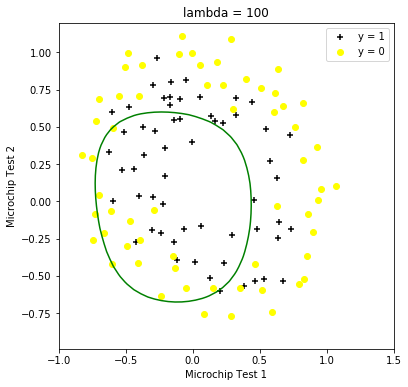

In [298]:
plotplot("lambda = 100")

Too much regularization (Underfitting)